In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt 
from sklearn.metrics import *

In [2]:
df = pd.read_csv("weatherHistory.csv")

## تاریخ های مختلف را تبدیل به «چندمین روز سال» نمایید.

In [3]:
df["date"] = np.zeros(len(df))
for i in range(len(df)):
    df["date"][i] = df["Formatted Date"][i][0:10]


df["time"] = np.zeros(len(df))
for i in range(len(df)):
    df["time"][i] = df["Formatted Date"][i][11:13]
    df["time"]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15012\1537859538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][i] = df["Formatted Date"][i][0:10]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15012\1537859538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"][i] = df["Formatted Date"][i][11:13]


In [4]:
import datetime
df["nth_day"] = np.zeros(len(df))
for i in range(len(df)):
    datetime.datetime.strptime(df["date"][i] ,'%Y-%m-%d')
    df["nth_day"][i] = datetime.datetime.strptime(df["date"][i],'%Y-%m-%d').timetuple().tm_yday
    df["nth_day"] = df["nth_day"].to_numpy(int)

df["nth_day"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15012\701414078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nth_day"][i] = datetime.datetime.strptime(df["date"][i],'%Y-%m-%d').timetuple().tm_yday


0         91
1         91
2         91
3         91
4         91
        ... 
96448    253
96449    253
96450    253
96451    253
96452    253
Name: nth_day, Length: 96453, dtype: int32

In [5]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df["date"]

0       2006-04-01
1       2006-04-01
2       2006-04-01
3       2006-04-01
4       2006-04-01
           ...    
96448   2016-09-09
96449   2016-09-09
96450   2016-09-09
96451   2016-09-09
96452   2016-09-09
Name: date, Length: 96453, dtype: datetime64[ns]

In [6]:
df = df.sort_values(by=['date'], ascending=True).reset_index()
df

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,nth_day
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,rain,5.472222,1.377778,0.87,22.7171,149.0,14.7959,0.0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22,1
1,2903,2006-01-01 23:00:00.000 +0100,Overcast,rain,5.422222,1.666667,0.86,19.5615,148.0,15.6492,0.0,1009.64,Mostly cloudy throughout the day.,2006-01-01,23,1
2,2901,2006-01-01 21:00:00.000 +0100,Overcast,rain,4.933333,0.555556,0.86,23.9407,139.0,15.7297,0.0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21,1
3,2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140.0,11.2700,0.0,1009.39,Mostly cloudy throughout the day.,2006-01-01,20,1
4,2899,2006-01-01 19:00:00.000 +0100,Overcast,rain,5.472222,1.100000,0.83,25.4058,145.0,10.9158,0.0,1009.55,Mostly cloudy throughout the day.,2006-01-01,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,89711,2016-12-31 02:00:00.000 +0100,Mostly Cloudy,snow,-1.488889,-4.750000,0.95,8.8711,207.0,7.9856,0.0,1020.48,Mostly cloudy throughout the day.,2016-12-31,02,366
96449,89710,2016-12-31 01:00:00.000 +0100,Mostly Cloudy,snow,-1.161111,-4.394444,0.95,8.9999,203.0,7.3255,0.0,1020.59,Mostly cloudy throughout the day.,2016-12-31,01,366
96450,89709,2016-12-31 00:00:00.000 +0100,Mostly Cloudy,snow,-0.872222,-4.083333,0.94,9.1126,197.0,9.7888,0.0,1020.67,Mostly cloudy throughout the day.,2016-12-31,00,366
96451,89722,2016-12-31 13:00:00.000 +0100,Mostly Cloudy,rain,2.622222,-0.983333,0.83,13.9909,205.0,9.8210,0.0,1020.32,Mostly cloudy throughout the day.,2016-12-31,13,366


In [28]:
new_df = df.copy()
new_df["mean of temperature"] = new_df["Temperature (C)"]
new_df.groupby("nth_day")["mean of temperature"].mean().reset_index().head(150)


,nth_day,mean of temperature
0,1,-1.211048
1,2,-0.310606
2,3,-0.437689
3,4,-0.755240
4,5,0.451999
...,...,...
145,146,18.491309
146,147,18.513868
147,148,18.168497
148,149,17.662689


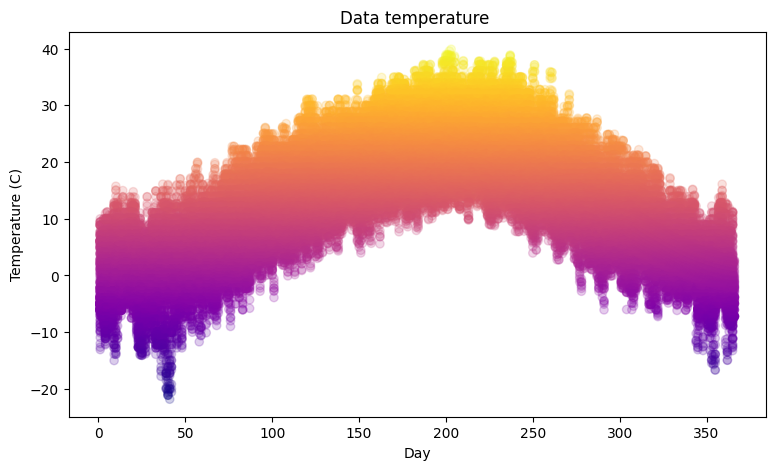

In [8]:
plt.figure(figsize=(9,5))

plt.scatter(df['nth_day'].to_numpy(), df['Temperature (C)'].to_numpy(), c=df['Temperature (C)'], cmap='plasma' ,alpha=0.2)
plt.title("Data temperature ")
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.show()

In [9]:
X = df['nth_day'].copy().to_numpy()
Y = df['Temperature (C)'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1) 
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((77162, 1), (19291, 1), (77162, 1), (19291, 1))

In [10]:
# number of features (x)== number of W's
# Activation Function Added
 
class Perceptron :
    def __init__(self , learning_rate , input_length , Activation_function):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.Activation_function = Activation_function

    def fit(self , X_train , Y_train  , X_test , Y_test , epochs):
        a=[]
        b=[]
        c=[]
        d=[]
        for epoch in tqdm(range(epochs)) :

            for x , y in zip(X_train , Y_train ): 
                y_pred = x @ self.weights + self.bias

                y_pred = self.activation_func(y_pred , self.Activation_function)
                # forwarding finished

                # START BACKPROPAGATION 
                error = y - y_pred
                
                # 2- updating weights and bias 
                self.weights = self.weights + (self.learning_rate * error * x)
                self.bias = self.bias + ( self.learning_rate * error)


            train_loss , train_acc = model.evaluate(X_train , Y_train)   
            test_loss , test_acc = model.evaluate(X_test , Y_test)
            a.append(train_loss)
            b.append(train_acc)
            c.append(test_loss)
            d.append(test_acc)

        return a,b,c,d


    def activation_func(self, x , function):
        if function == "sigmoid" :
            return 1 / (1 + np.exp(-x)) 
        
        elif function == "relu" :
            return np.maximum(0 , x)
        
        elif function == "tanh" :
            return np.tanh(x)
        
        elif function == "linear" :
            return x 
        
        elif function == "leaky-relu":
            return np.maximum(0.01* x , x)
        
        elif function == "gelu" :
            return 0.5 * x * (1 + np.tanh(np.sqrt(2) / (np.pi * (x + 0.044715 * 3))))
        
        else :
            raise Exception("unknown activation function")



    def predict(self , X_test):
        Y_pred = []
        for x_test in X_test :
            y_pred = x_test @ self.weights + self.bias 
            y_pred = self.activation_func(y_pred , self.Activation_function)
            Y_pred.append(y_pred)

        return np.array(Y_pred)

    def predict2(self , X_test):
        y_pred = X_test @ self.weights + self.bias 
        Y_pred = int(self.activation_func(y_pred , self.Activation_function))

        return np.array(Y_pred)

    def calc_loss(self, X_test , Y_test , metric):
        Y_pred = self.predict(X_test)
        if metric == "mse" :
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae" :
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square( Y_test - Y_pred)))
        else :
            raise Exception("unknown metric")
        


    def calc_accuracy(self , X_test , Y_test):
        Y_pred = self.predict(X_test)
        
        accuracy = median_absolute_error(Y_pred , Y_test)
        return accuracy


    def evaluate(self , X_test , Y_test):

        loss = self.calc_loss(X_test , Y_test , "rmse")
        accuracy = self.calc_accuracy(X_test , Y_test)
        
        return loss , accuracy



        
model = Perceptron(learning_rate= 0.00001 , input_length= 1 , Activation_function="relu")
a,b,c,d = model.fit(X_train , Y_train , X_test , Y_test , epochs=30)



100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


In [11]:
model.evaluate(X_test,Y_test)


(9.702027549644084, 7.312060447558098)

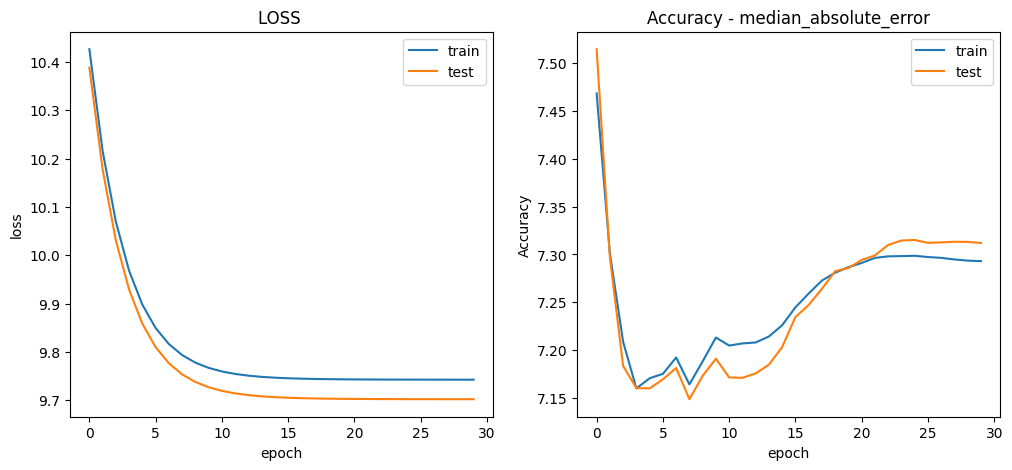

In [12]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(a)
ax1.plot(c)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text('LOSS ')

ax2.plot(b)
ax2.plot(d)
ax2.set_xlabel("epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Accuracy - median_absolute_error')

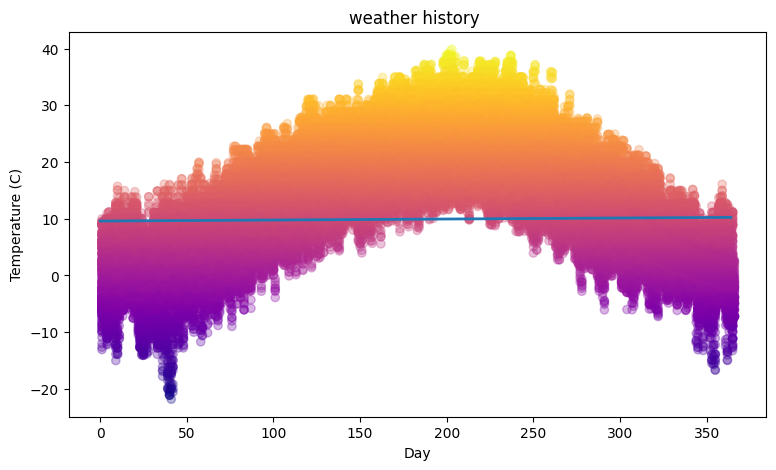

In [13]:
plt.figure(figsize=(9,5))

plt.scatter(df['nth_day'].to_numpy(), df['Temperature (C)'].to_numpy(),alpha=0.3, c=df['Temperature (C)'], cmap='plasma')
plt.plot(model.weights[0] *range(365) + model.bias[0]  , linewidth=2)
plt.title("weather history ")
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.show()

In [14]:
model.predict2(X_test[115])

array(9)